In [3]:
import pandas
df = "Travel Pony Facebook.csv"

In [4]:
# Create a cost per inpressions column
df['Cost per Impression'] = df['Amount Spent (USD)']/df['Impressions']

# create a day of the week column
df['newdate'] = pandas.to_datetime(df['Start Date'])
df['Day of week'] = df['newdate'].dt.dayofweek

In [8]:
# Get an average value for each day of the week
problem1 = df.groupby(['Day of week']).mean()
means = problem1['Cost per Impression'].mean()

# sort by average cost per impressions
problem1 = problem1.sort_values("Cost per Impression")

/Users/hunterush/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hunterush/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hunterush/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hunterush/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/hunterush/ana

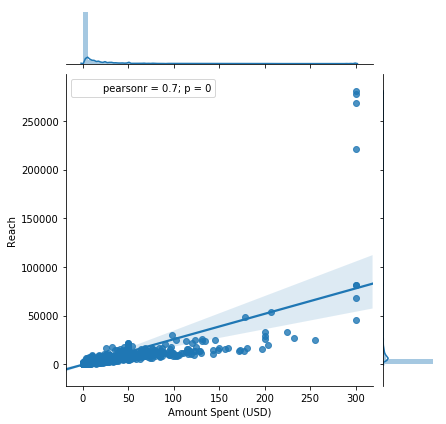

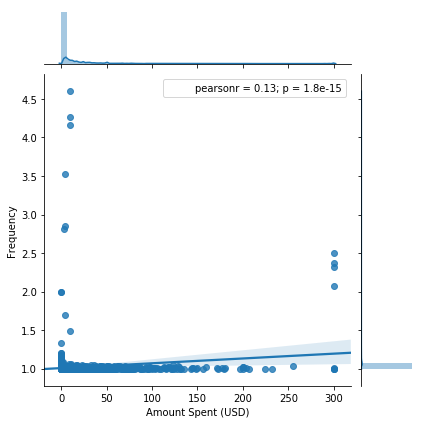

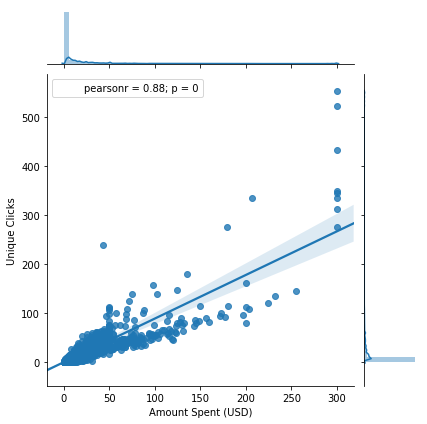

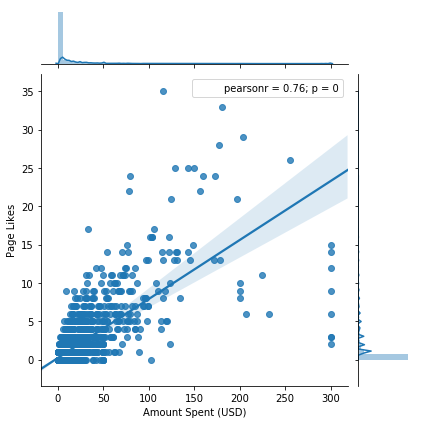

In [9]:
import seaborn as sns

# create scatterplots to view relationship between "Amount Spent" on ads and four different variables
sns.jointplot('Amount Spent (USD)', 'Reach', data=df, kind='reg')
sns.jointplot('Amount Spent (USD)', 'Frequency', data=df, kind='reg')
sns.jointplot('Amount Spent (USD)', 'Unique Clicks', data=df, kind='reg')
sns.jointplot('Amount Spent (USD)', 'Page Likes', data=df, kind='reg')

In [11]:
import statsmodels.api as sm
import numpy as np
target = pandas.DataFrame(df, columns =['Unique Clicks'])

# create dataframes for individual variables to perform a regression analysis
W = df['Frequency']
X = df['Reach']
Y = target['Unique Clicks']

In [12]:
# Give a summary of the relatiosnhip between Unique Clicks and Reach
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique Clicks   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     4334.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        16:48:44   Log-Likelihood:                -16045.
No. Observations:                3705   AIC:                         3.209e+04
Df Residuals:                    3704   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Reach          0.0020   3.09e-05     65.832      0.000       0.002       0.002
==============================================================================
Omnibus:                     4800.065   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5192547.294
Skew:                           6.420   Prob(JB):                         0.00
Kurtosis:                     185.951   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Give a summary of the relatiosnhip between Unique Clicks and Frequency
model2 = sm.OLS(Y, W).fit()
predictions = model.predict(W)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Unique Clicks   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     363.1
Date:                Thu, 18 Oct 2018   Prob (F-statistic):           2.64e-77
Time:                        16:50:16   Log-Likelihood:                -17307.
No. Observations:                3705   AIC:                         3.462e+04
Df Residuals:                    3704   BIC:                         3.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Frequency      7.9291      0.416     19.056      0.000       7.113       8.745
==============================================================================
Omnibus:                     5923.176   Durbin-Watson:                   0.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3853539.229
Skew:                          10.278   Prob(JB):                         0.00
Kurtosis:                     159.651   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""